# EDA Y PREPROCESADO

In [1]:
import sys

sys.path.insert(0, '../')
import utils.bootcampviztools as btz
import utils.utils as ut 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


## Descripción de las variables

| Nombre de columna     | Tipo de variable | Descripción                                                | Comentarios |
|----------------------|----------------|------------------------------------------------------------|-------------|
| Channel             | Categórica      | Canal de venta del cliente (Horeca(hotel, restaurante, cafe) o Minorista) | Convertido a categórico |
| Region              | Categórica      | Región geográfica del cliente (Lisboa, Oporto, Otro)      | Convertido a categórico |
| Fresh               | Numérica        | Gasto en productos frescos                                | Transformado logarítmicamente |
| Milk                | Numérica        | Gasto en productos lácteos                                | Transformado logarítmicamente |
| Grocery             | Numérica        | Gasto en productos de supermercado                        | Transformado logarítmicamente |
| Frozen              | Numérica        | Gasto en productos congelados                             | Transformado logarítmicamente |
| Detergents_Paper    | Numérica        | Gasto en productos de limpieza y papel                    | Transformado logarítmicamente |
| Delicassen          | Numérica        | Gasto en productos de delicatessen                        | Transformado logarítmicamente |


In [20]:
df = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\ML\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
ut.data_report(df)

COL_N,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,3,433,421,430,426,417,403
CARDIN (%),0.45,0.68,98.41,95.68,97.73,96.82,94.77,91.59


## Variables categóricas

* Columnas = Channel y Region
* Tienen baja cardinalidad

In [6]:
df['Channel'] = df['Channel'].astype('object')
df['Region'] = df['Region'].astype('object')

In [7]:
features_cat = ut.get_features_cat(df)
features_cat

['Channel', 'Region']

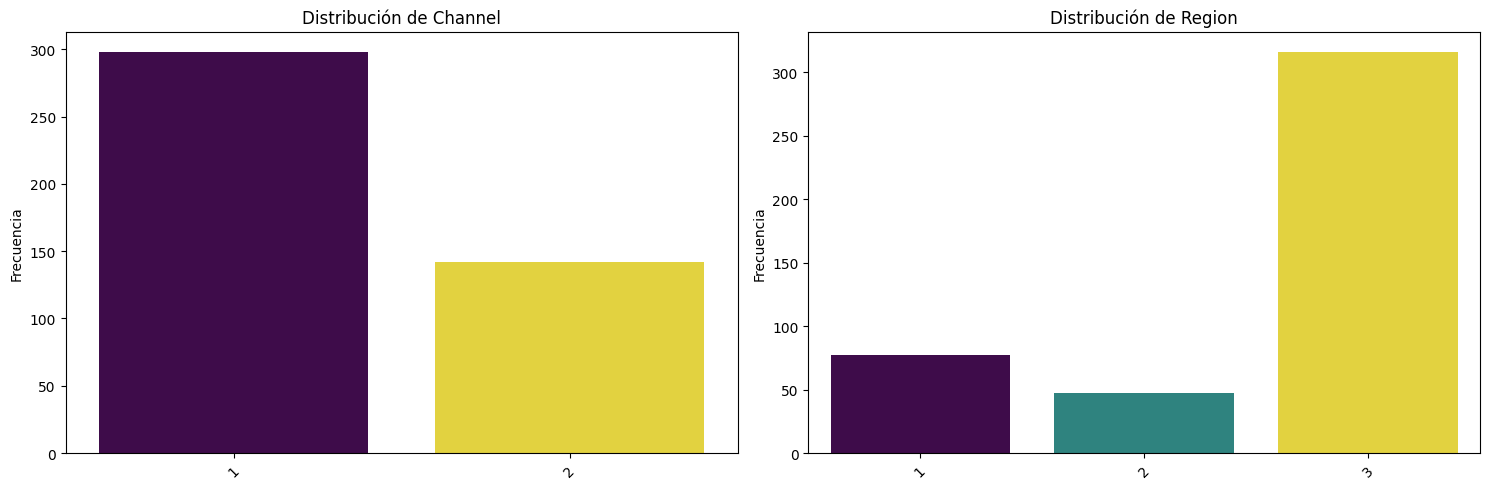

In [8]:
btz.pinta_distribucion_categoricas(df, features_cat)

## Variables numéricas

In [9]:
features_num = ut.get_features_num(df)
features_num

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>]], dtype=object)

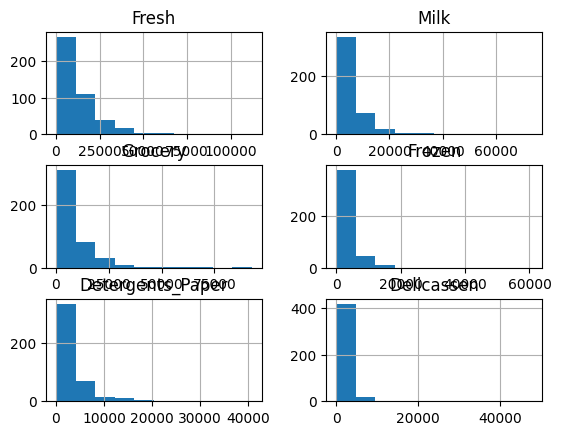

In [10]:
df.hist(features_num)

In [24]:
df.skew().sort_values(ascending= False)

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
Channel              0.760951
Region              -1.283627
dtype: float64

| Variable	| Skewness	| Comentario
Delicassen	11.15	Extremadamente sesgada a la derecha 🟥
Frozen	5.91	Muy sesgada a la derecha 🟥
Milk	4.05	Muy sesgada a la derecha 🟥
Detergents_Paper	3.63	Muy sesgada a la derecha 🟥
Grocery	3.59	Muy sesgada a la derecha 🟥
Fresh	2.56	Alta asimetría a la derecha 🟥
Channel	0.76	Ligeramente sesgada a la derecha ⚠️
Region	-1.28	Sesgada a la izquierda ⚠️


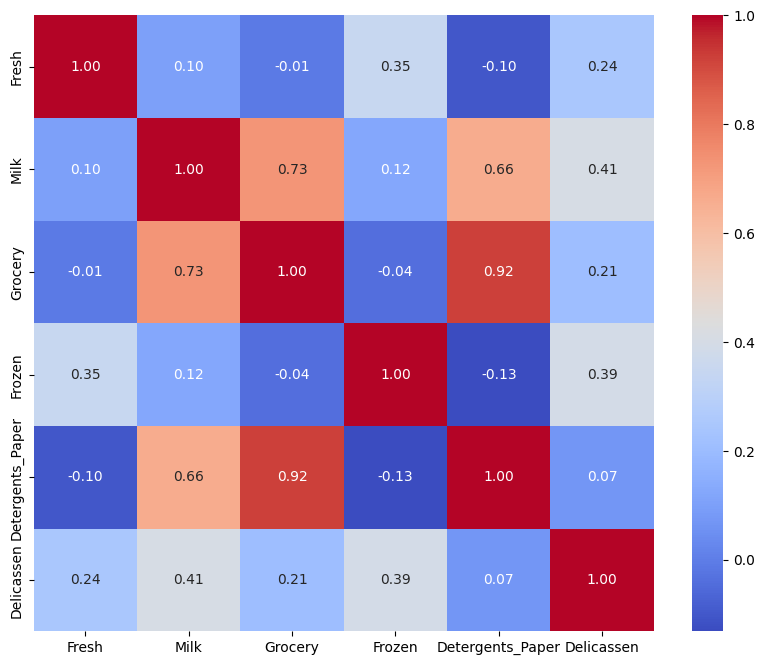

In [11]:
corr_matrix = df[features_num].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

* Grocery y Detergents_Paper → 0.92. Los que compran limpieza suelen comprar productos de super.

* Milk y Grocery → 0.72 Lo mismo pero con lácteos y super.

* Fresh y Frozen → 0.34 En menor medida, pero si compran alimentos frescos también congelados. 

* Detergents_Paper y Fresh/Frozen → -0.10 / -0.13 Limpieza y alimentos frescos/congelados no van de la mano. 

## Análisis de outliers

* Las distribuciones están desbalanceadas y tienen muchos outliers. Hacemo una transformación logarítmica para hacer los datos más simétricos y mejorar la calidad de los datos.

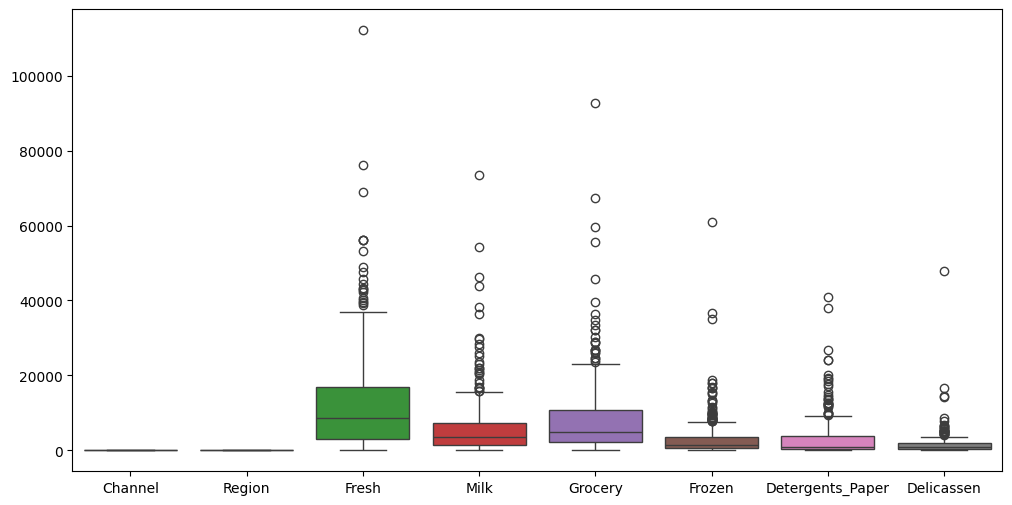

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.show()

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((df < lower_bound) | (df > upper_bound))
outliers_count = outliers_iqr.sum()

print("Número de outliers por variable (IQR):")
print(outliers_count)


Número de outliers por variable (IQR):
Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64


In [26]:
# Conteo de filas con al menos un outlier
outlier_rows = outliers_iqr.any(axis=1)
print(f"Filas con al menos un outlier: {outlier_rows.sum()} de {len(df_selected)}")


Filas con al menos un outlier: 108 de 440


## Transformaciones

In [27]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_selected = df[features]

In [28]:
# Transoformacion logaritmica
df_log = np.log1p(df_selected)

In [29]:
#Escalado
scaler = MinMaxScaler()
df_scaled_log = pd.DataFrame(scaler.fit_transform(df_log), columns=df_selected.columns)

In [ ]:
#features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
#df_selected = df[features]

#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df_selected)

#df_scaled = pd.DataFrame(df_scaled, columns=features)

#df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>]], dtype=object)

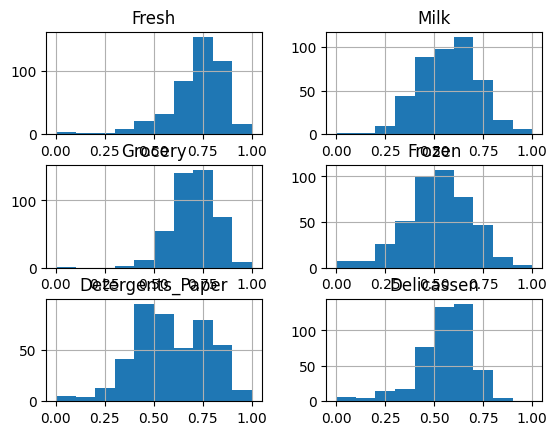

In [30]:
df_scaled_log.hist()

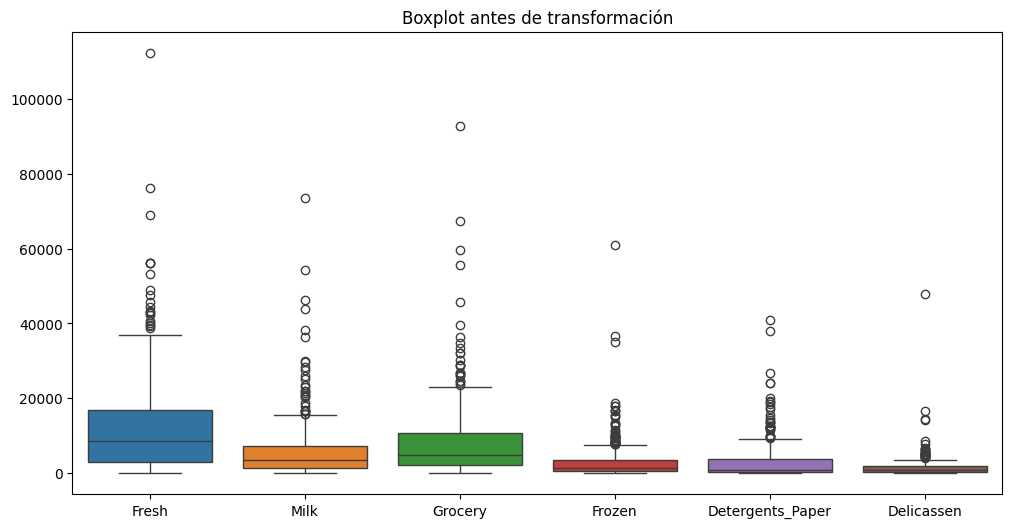

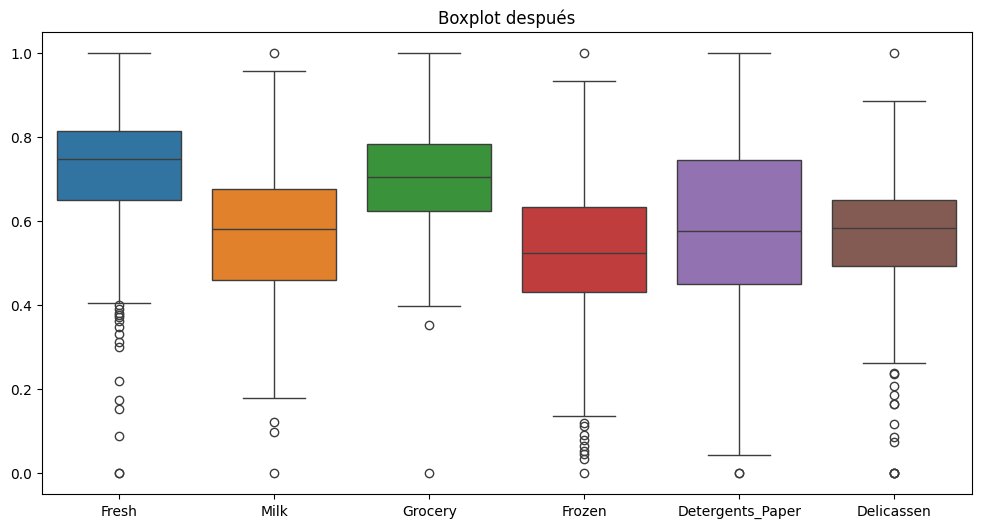

In [32]:
# Boxplots antes de normalizar
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features])
plt.title("Boxplot antes de transformación")
plt.show()

# Boxplots después de normalizar
plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaled_log)
plt.title("Boxplot después")
plt.show()


In [34]:
df_final = pd.concat([df_scaled_log, df[['Channel', 'Region']].reset_index(drop=True)], axis=1)

In [44]:
print(f"Duplicados en df_scaled_log: {df_scaled_log.duplicated().sum()}")
print(f"Duplicados en df_final: {df_final.duplicated().sum()}")


Duplicados en df_scaled_log: 0
Duplicados en df_final: 0


## Análisis de correlación

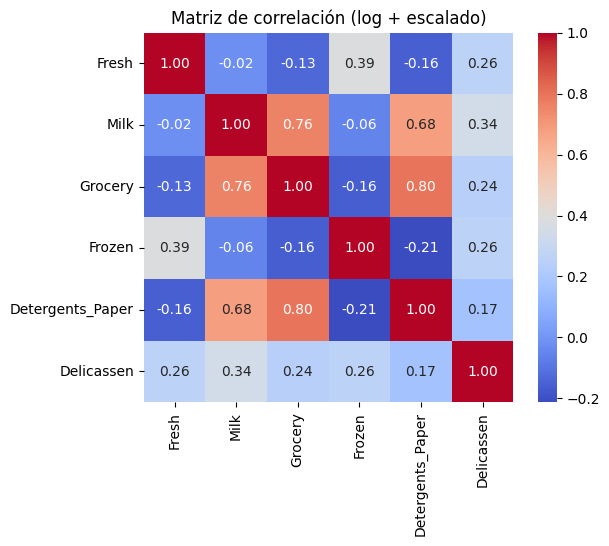

In [45]:
sns.heatmap(df_scaled_log.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación (log + escalado)")
plt.show()

📊 Matriz de correlación (log-transformado)
Valores cercanos a ±1 indican fuerte relación lineal.

Variables	Correlación	Comentario
Milk ~ Grocery	0.76	🔥 Muy alta correlación
Grocery ~ Detergents_Paper	0.80	🔥 Muy alta correlación
Milk ~ Detergents_Paper	0.68	Alta correlación
Fresh ~ Frozen	0.39	Relación leve
Otros pares	< 0.35	Correlaciones bajas o débiles


🧠 Interpretación
Estas correlaciones son normales en este dataset, ya que:

Los clientes que compran mucho en Grocery, también suelen comprar Detergents_Paper y Milk.

Son productos complementarios o relacionados, y tienden a crecer juntos.

Pero para clustering, esto tiene consecuencias:

In [38]:
df_final.to_csv(r"C:\Users\patri\REPO_PRUEBA\ML_Customer_Segmentation\src\data_sample\wholesale_customers_final.csv", index=False)